In [13]:
# Generate csv data (takes a really long time)

import EXPERIMENTATION_TOOLKIT as experiments

experiments.run_experiments(200, 20, 'final_data.csv')

Progress: 0th run. Estimated time left: 0.59 minutes
Progress: 1th run. Estimated time left: 0.55 minutes
Progress: 2th run. Estimated time left: 0.51 minutes
Progress: 3th run. Estimated time left: 0.49 minutes
Progress: 4th run. Estimated time left: 0.48 minutes
Progress: 5th run. Estimated time left: 0.43 minutes
Progress: 6th run. Estimated time left: 0.41 minutes
Progress: 7th run. Estimated time left: 0.37 minutes
Progress: 8th run. Estimated time left: 0.34 minutes
Progress: 9th run. Estimated time left: 0.35 minutes


In [3]:
import EXPERIMENTATION_TOOLKIT as experiments
experiments.generate_random_data(6, 100, 'fake_data.csv')

['[26, 14]', '[34, 20]', '[42, 67]', '[30, 39]', '[16, 72]', '[50, 33]']
['[67, 79]', '[47, 49]', '[41, 40]', '[5, 34]', '[56, 50]', '[47, 30]']
['[61, 20]', '[33, 80]', '[48, 53]', '[10, 73]', '[40, 64]', '[4, 20]']
['[20, 32]', '[45, 25]', '[49, 61]', '[52, 42]', '[32, 11]', '[2, 24]']
['[58, 58]', '[18, 74]', '[30, 33]', '[51, 46]', '[27, 9]', '[48, 61]']
['[46, 76]', '[15, 64]', '[54, 18]', '[32, 38]', '[42, 25]', '[58, 32]']
['[43, 56]', '[63, 74]', '[3, 32]', '[56, 57]', '[42, 45]', '[6, 50]']
['[61, 25]', '[48, 79]', '[40, 10]', '[63, 27]', '[39, 45]', '[53, 79]']
['[11, 26]', '[32, 16]', '[6, 66]', '[37, 75]', '[40, 10]', '[12, 42]']
['[41, 60]', '[50, 76]', '[25, 38]', '[25, 67]', '[55, 20]', '[25, 21]']
['[3, 80]', '[20, 72]', '[46, 15]', '[39, 79]', '[49, 31]', '[9, 40]']
['[45, 55]', '[11, 69]', '[21, 23]', '[36, 35]', '[10, 63]', '[41, 22]']
['[32, 7]', '[60, 24]', '[23, 61]', '[23, 22]', '[36, 68]', '[57, 25]']
['[16, 61]', '[42, 77]', '[62, 80]', '[38, 52]', '[36, 20]', 

In [1]:
import numpy as np
import pandas as pd
import ast
import EXPERIMENTATION_TOOLKIT as experiments


# Load and preprocess the data
file_path = 'final_data.csv'  # replace with your file path
sequences = experiments.load_and_parse_data(file_path)
inputs, targets = experiments.split_sequences(sequences, 6)

print(inputs)
print(targets)



pygame 2.5.2 (SDL 2.28.3, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
Discarded 0 sequences
[[[26 14]
  [34 20]
  [42 67]]

 [[67 79]
  [47 49]
  [41 40]]

 [[61 20]
  [33 80]
  [48 53]]

 [[20 32]
  [45 25]
  [49 61]]

 [[58 58]
  [18 74]
  [30 33]]

 [[46 76]
  [15 64]
  [54 18]]

 [[43 56]
  [63 74]
  [ 3 32]]

 [[61 25]
  [48 79]
  [40 10]]

 [[11 26]
  [32 16]
  [ 6 66]]

 [[41 60]
  [50 76]
  [25 38]]

 [[ 3 80]
  [20 72]
  [46 15]]

 [[45 55]
  [11 69]
  [21 23]]

 [[32  7]
  [60 24]
  [23 61]]

 [[16 61]
  [42 77]
  [62 80]]

 [[23 52]
  [25 46]
  [42 47]]

 [[47 16]
  [21 18]
  [25 14]]

 [[41 35]
  [29 68]
  [48 71]]

 [[26 25]
  [16 53]
  [11 37]]

 [[63 74]
  [46 71]
  [ 9 26]]

 [[65 77]
  [46 66]
  [12 62]]

 [[40 77]
  [26 54]
  [16 67]]

 [[21 40]
  [23 70]
  [ 6 71]]

 [[66 32]
  [42 71]
  [68 17]]

 [[ 4  9]
  [30 57]
  [45 20]]

 [[ 9 46]
  [65 34]
  [49 17]]

 [[ 9 40]
  [22 48]
  [57 68]]

 [[40 43]
  [11 45]
  [ 3 11]]



In [6]:
from sklearn.model_selection import train_test_split

# Splitting the Data
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [8]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Dropout
from keras.regularizers import l2

# Defining constants we are going to use
n_input = 3  # HALF OF THE WHOLE SEQUENCE LENGTH
n_output = 3  # HALF OF THE WHOLE SEQUENCE LENGTH
n_features = 2 # We can add grass or not

# Define the model
model = Sequential()

# Encoder part
model.add(LSTM(150, activation='tanh', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(100, activation='tanh', return_sequences=False))

# RepeatVector is used as a bridge between the encoder and decoder parts
model.add(RepeatVector(n_output))


# Decoder part
model.add(LSTM(150, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='tanh', return_sequences=True))

# Densely connected output layer
model.add(TimeDistributed(Dense(n_features)))

# Compiling the model
optimizer = Adam(clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mse')

In [9]:
model.fit(input_train, target_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
3/3 [==============================] - 6s 15ms/step - loss: 2029.3401
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 2015.2432
Epoch 3/5
3/3 [==============================] - 0s 14ms/step - loss: 1976.5414
Epoch 4/5
3/3 [==============================] - 0s 17ms/step - loss: 1883.0764
Epoch 5/5
3/3 [==============================] - 0s 13ms/step - loss: 1735.4631


In [10]:
loss = model.evaluate(input_test, target_test, verbose=0)
print('Model loss:', loss)

Model loss: 1518.92529296875


1/1 [==============================] - 1s 1s/step


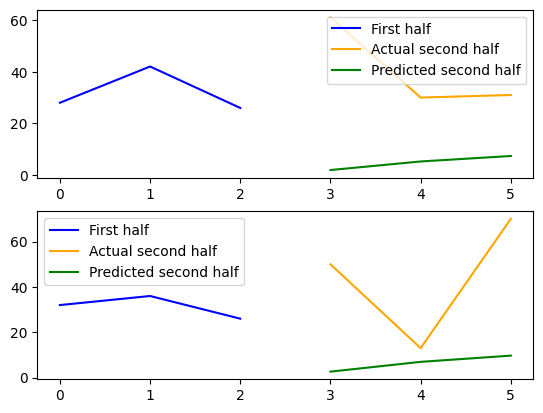

In [11]:
import matplotlib.pyplot as plt
import random

# pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# reshape the input sequence and make a prediction
predicted_seq = model.predict(input_seq.reshape(1, n_input, n_features))[0]

# create two subplots, one for each variable
fig, axs = plt.subplots(2)

# use different colors for the first half, actual second half and predicted second half
colors = ['blue', 'orange', 'green']

for i in range(2):
    # plot the first half of the sequence
    axs[i].plot(range(0, n_input), input_seq[:, i], color=colors[0], label='First half')
    # plot the second half of the sequence
    axs[i].plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1], label='Actual second half')
    # plot the model's prediction for the second half of the sequence
    axs[i].plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2], label='Predicted second half')
    axs[i].legend()

plt.show()

1/1 [==============================] - 0s 21ms/step


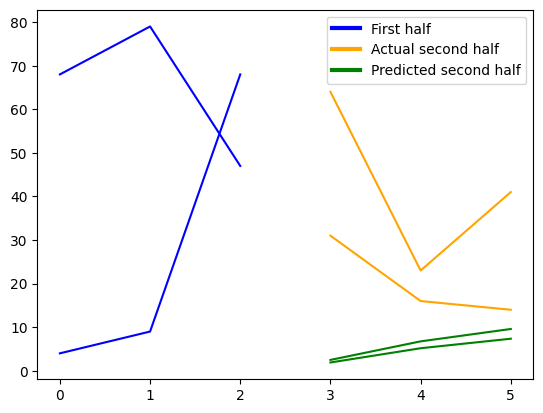

In [12]:
from matplotlib.lines import Line2D

# Assuming input_test and target_test are correctly shaped as (num_samples, n_input, n_features)
# Pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# Get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# Reshape the input sequence for prediction if necessary
if input_seq.ndim < 3:
    input_seq = input_seq.reshape(1, n_input, n_features)

# Make a prediction
predicted_seq = model.predict(input_seq)[0]

# Create a plot
fig, ax = plt.subplots()

# Use different colors for the first half, actual second half, and predicted second half
colors = ['blue', 'orange', 'green']

# Plot the first half of the sequence, the second half of the sequence, and the prediction
for i in range(2):  # Only predict 2 variables
    ax.plot(range(0, n_input), input_seq[0, :, i], color=colors[0])
    ax.plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1])
    ax.plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2])

# Set up legend
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['First half', 'Actual second half', 'Predicted second half']
ax.legend(lines, labels)

plt.show()